In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

%matplotlib inline

In [16]:
def pm_polar(ax, t, x, colors):
    """Polar plot with different colors for positive and negative values"""
    ax.plot(t[x > 0], x[x > 0], colors[0])
    ax.plot(t[x <= 0], -x[x <= 0], colors[1])


def init_ax():
    for i, bi in enumerate(bands):
        ax[0, i].clear()
        ax[1, i].clear()
        ax[0, i].set_xticks([])
        ax[1, i].set_xticks([])
        # ax[0, i].set_rticks([])
        # ax[1, i].set_rticks([])
        ax[0, i].set_yticks([])
        ax[1, i].set_yticks([])


def update(frame):
    init_ax()
    for i, bi in enumerate(bands):
        bb = b[bi, frame]
        if b.real.nonzero()[0].any():
            pm_polar(ax[0, i], t, bb.real, colors)
        if b.imag.nonzero()[0].any():
            pm_polar(ax[1, i], t, bb.imag, colors)

In [158]:
N = 1024
B = 6
t = np.linspace(0, 2*2*np.pi, N)
colors = ['#ef8a62', '#67a9cf']
bands = np.arange(0, B)

frames = np.stack([
    np.concatenate([np.full(20, 1.0), np.linspace(1.0, bi, 100),
                    np.full(20, bi), np.linspace(bi, 1.0, 100),
                    np.full(20, 1.0)])
    for bi in bands], 0)

# frames = np.stack([np.arange(0, 1, 2*np.pi/N) for bi in bands], 0)
# frames[0] = 1.0
b = np.exp(1j * frames[..., None] *  t[None, None, :])
# b = np.exp(1j * frames[..., None] * bands[:, None, None] * t[None, None, :])
# b = np.exp(1j* frames[..., None]) * np.exp(1j * t[None, None, :])

In [159]:
b.shape

(6, 260, 1024)

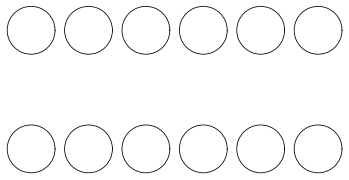

In [160]:
fig, ax = plt.subplots(2, len(bands), subplot_kw={'projection': 'polar'})

init_ax()

In [161]:
ani = FuncAnimation(
    fig, update, frames=np.arange(frames.shape[1]), interval=50)
video = ani.to_html5_video()
  
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)
plt.close()

In [157]:
    T = 2
    Nt = 4 * T
    St = 100
    t = np.linspace(0, Nt, St * T + 1)[:, np.newaxis]
    x = np.cos(2 * np.pi * t / T) + 1

    Nf = 2 / T
    Sf = 250
    f = np.linspace(0, Nf, int(Sf * Nf) + 1)
    M = np.exp(2 * np.pi * 1j * f * t)


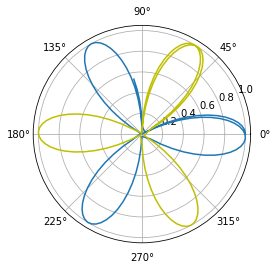

In [94]:
R = 120
plt.polar(t[M[:, R].real > 0], M[:, R].real[M[:, R].real > 0])
plt.polar(t[M[:, R].real <= 0], -M[:, R].real[M[:, R].real <= 0], 'y')